In [ ]:
import pandas as pd
df = pd.read_csv('C:/Users/tj/Desktop/정규프로젝트/data/TR/TR_전국_전처리/전국_조인_사전없음.csv')

In [2]:
# 전처리 전 결측값 확인
print(df.isnull().sum())

TRAVELER_ID                 0
MALE                        0
FEMALE                      0
AGE_GRP                     0
JOB_1                       0
JOB_2                       0
JOB_3                       0
JOB_4                       0
JOB_5                       0
TRAVEL_TERM                 0
TRAVEL_NUM                  0
MOTIVE_1                    0
MOTIVE_2                    0
MOTIVE_3                    0
MOTIVE_4                    0
MOTIVE_5                    0
MOTIVE_6                    0
MOTIVE_7                    0
MOTIVE_8                    0
MOTIVE_9                    0
TRAVEL_COMPANIONS_NUM       0
ACT_TYPE                   63
ACT_1                       0
ACT_2                       0
ACT_3                       0
ACT_4                       0
ACT_5                       0
MVMN_1                    602
MVMN_2                    602
MVMN_3                    602
MVMN_4                    602
LODGING_1                5264
LODGING_2                5264
LODGING_3 

In [6]:
# NAN값 확인1
print(df[['MALE', 'FEMALE', 'AGE_GRP','JOB_1','JOB_2','JOB_3','JOB_4','JOB_5',
          'TRAVEL_TERM','TRAVEL_NUM','TRAVEL_COMPANIONS_NUM'
          ,'MOTIVE_1','MOTIVE_2','MOTIVE_3','MOTIVE_4','MOTIVE_5','MOTIVE_6','MOTIVE_7','MOTIVE_8','MOTIVE_9','PAYMENT_GRADE']].isna().sum())

MALE                     0
FEMALE                   0
AGE_GRP                  0
JOB_1                    0
JOB_2                    0
JOB_3                    0
JOB_4                    0
JOB_5                    0
TRAVEL_TERM              0
TRAVEL_NUM               0
TRAVEL_COMPANIONS_NUM    0
MOTIVE_1                 0
MOTIVE_2                 0
MOTIVE_3                 0
MOTIVE_4                 0
MOTIVE_5                 0
MOTIVE_6                 0
MOTIVE_7                 0
MOTIVE_8                 0
MOTIVE_9                 0
PAYMENT_GRADE            0
dtype: int64


In [7]:
# NAN값 확인2
print(df[['ACT_1','ACT_2','ACT_3','ACT_4','ACT_5',
          'MVMN_1','MVMN_2','MVMN_3','MVMN_4',
          'LODGING_1','LODGING_2','LODGING_3',
          'LODGING_4','LODGING_5','LODGING_6']].isna().sum())

ACT_1           0
ACT_2           0
ACT_3           0
ACT_4           0
ACT_5           0
MVMN_1        602
MVMN_2        602
MVMN_3        602
MVMN_4        602
LODGING_1    5264
LODGING_2    5264
LODGING_3    5264
LODGING_4    5264
LODGING_5    5264
LODGING_6    5264
dtype: int64


In [8]:
# 공백 문자 제거 후 0으로 대체
df[['MVMN_1','MVMN_2','MVMN_3','MVMN_4',
    'LODGING_1','LODGING_2','LODGING_3',
    'LODGING_4','LODGING_5','LODGING_6']] = df[['MVMN_1',
    'MVMN_2','MVMN_3','MVMN_4',
    'LODGING_1','LODGING_2','LODGING_3',
    'LODGING_4','LODGING_5','LODGING_6']].replace(r'^\s*$', 0, regex=True).fillna(0)


In [9]:
# NAN값 확인 

print(df.isnull().sum())

TRAVELER_ID               0
MALE                      0
FEMALE                    0
AGE_GRP                   0
JOB_1                     0
JOB_2                     0
JOB_3                     0
JOB_4                     0
JOB_5                     0
TRAVEL_TERM               0
TRAVEL_NUM                0
MOTIVE_1                  0
MOTIVE_2                  0
MOTIVE_3                  0
MOTIVE_4                  0
MOTIVE_5                  0
MOTIVE_6                  0
MOTIVE_7                  0
MOTIVE_8                  0
MOTIVE_9                  0
TRAVEL_COMPANIONS_NUM     0
ACT_TYPE                 63
ACT_1                     0
ACT_2                     0
ACT_3                     0
ACT_4                     0
ACT_5                     0
MVMN_1                    0
MVMN_2                    0
MVMN_3                    0
MVMN_4                    0
LODGING_1                 0
LODGING_2                 0
LODGING_3                 0
LODGING_4                 0
LODGING_5           

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 종속 변수와 독립 변수 설정
X = df[['MALE', 'FEMALE', 'AGE_GRP','JOB_1','JOB_2','JOB_3','JOB_4','JOB_5',
          'TRAVEL_TERM','TRAVEL_NUM','TRAVEL_COMPANIONS_NUM'
          ,'MOTIVE_1','MOTIVE_2','MOTIVE_3','MOTIVE_4','MOTIVE_5','MOTIVE_6','MOTIVE_7','MOTIVE_8','MOTIVE_9',
          'ACT_1','ACT_2','ACT_3','ACT_4','ACT_5',
          'MVMN_1','MVMN_2','MVMN_3','MVMN_4',
          'LODGING_1','LODGING_2','LODGING_3',
          'LODGING_4','LODGING_5','LODGING_6']] 
          ##,'TRAVEL_MOTIVE_1','TRAVEL_MOTIVE_2','TRAVEL_MOTIVE_3','TRAVEL_MOTIVE_4','TRAVEL_MOTIVE_5',
          ##'TRAVEL_MOTIVE_6','TRAVEL_MOTIVE_7','TRAVEL_MOTIVE_8','TRAVEL_MOTIVE_9']]

y = df['PAYMENT_GRADE']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# 특성 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 변수별 회귀 계수 출력
coefficients = model.coef_[0]  # 첫 번째 클래스의 계수
features = X.columns  # 피처 이름

# 계수와 피처를 데이터프레임으로 정리
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df)


[[1562   65]
 [ 162  259]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1627
           1       0.80      0.62      0.70       421

    accuracy                           0.89      2048
   macro avg       0.85      0.79      0.81      2048
weighted avg       0.88      0.89      0.88      2048

                  Feature  Coefficient
29              LODGING_1     1.075979
31              LODGING_3     0.918265
28                 MVMN_4     0.842565
10  TRAVEL_COMPANIONS_NUM     0.711937
25                 MVMN_1     0.505343
32              LODGING_4     0.437421
34              LODGING_6     0.403052
26                 MVMN_2     0.331070
30              LODGING_2     0.316396
27                 MVMN_3     0.231883
33              LODGING_5     0.174262
19               MOTIVE_9     0.134100
8             TRAVEL_TERM     0.130887
22                  ACT_3     0.112868
13               MOTIVE_3     0.093882
21                  AC

[[1465  162]
 [ 166  255]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1627
           1       0.61      0.61      0.61       421

    accuracy                           0.84      2048
   macro avg       0.75      0.75      0.75      2048
weighted avg       0.84      0.84      0.84      2048



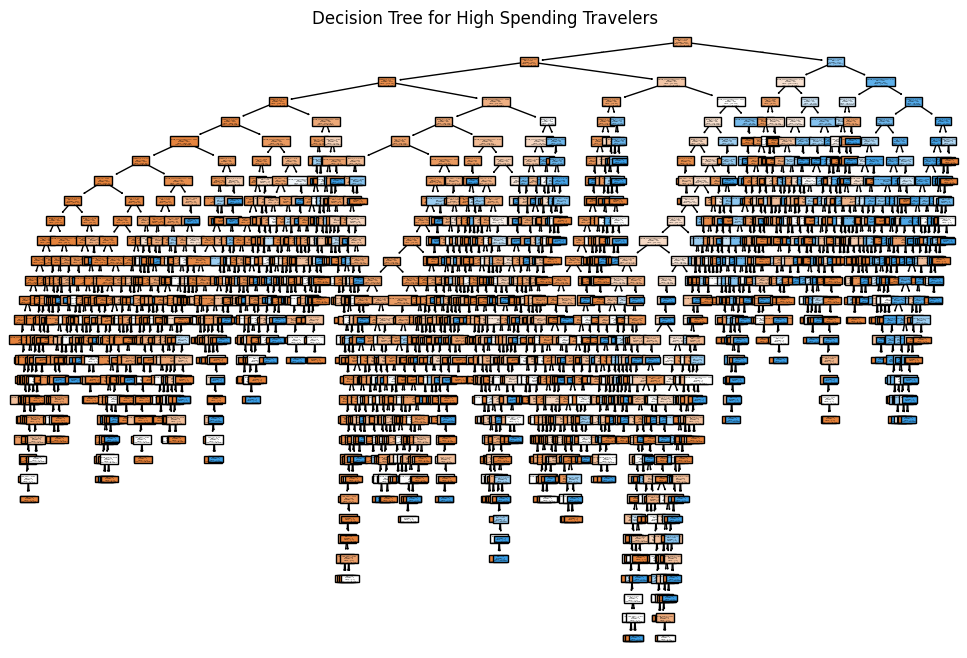

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 결정 트리 모델 생성 및 훈련
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 결정 트리 시각화
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Not High Spend', 'High Spend'], filled=True)
plt.title("Decision Tree for High Spending Travelers")
plt.show()

[[1564   63]
 [ 165  256]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1627
           1       0.80      0.61      0.69       421

    accuracy                           0.89      2048
   macro avg       0.85      0.78      0.81      2048
weighted avg       0.88      0.89      0.88      2048



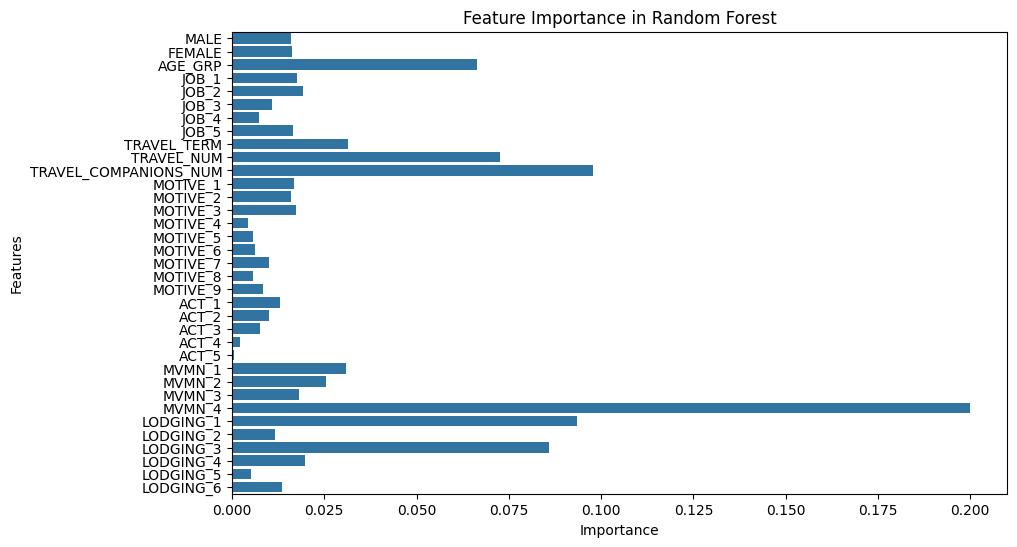

                  Feature  Importance
28                 MVMN_4    0.199979
10  TRAVEL_COMPANIONS_NUM    0.097820
29              LODGING_1    0.093534
31              LODGING_3    0.085977
9              TRAVEL_NUM    0.072572
2                 AGE_GRP    0.066494
8             TRAVEL_TERM    0.031402
25                 MVMN_1    0.030823
26                 MVMN_2    0.025564
32              LODGING_4    0.019785
4                   JOB_2    0.019176
27                 MVMN_3    0.018064
3                   JOB_1    0.017500
13               MOTIVE_3    0.017318
11               MOTIVE_1    0.016796
7                   JOB_5    0.016441
1                  FEMALE    0.016238
12               MOTIVE_2    0.016064
0                    MALE    0.016002
34              LODGING_6    0.013470
20                  ACT_1    0.013080
30              LODGING_2    0.011656
5                   JOB_3    0.010796
17               MOTIVE_7    0.009938
21                  ACT_2    0.009924
19          

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 피처 중요도 시각화
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# 피처 중요도 출력
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

In [15]:
# SVM
# 예측
y_pred = model.predict(X_test)

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# SVM 결정 경계 시각화 (2D)
# 아래 코드는 X의 두 개의 특성만 사용하는 경우에 해당합니다.
# 주의: 2D 시각화를 위해 필요한 경우 두 개의 특성만 선택하세요.
if X.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', s=50)
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

[[1564   63]
 [ 165  256]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1627
           1       0.80      0.61      0.69       421

    accuracy                           0.89      2048
   macro avg       0.85      0.78      0.81      2048
weighted avg       0.88      0.89      0.88      2048



Epoch 1/50
205/205 [==============================] - 2s 5ms/step - loss: 0.3585 - accuracy: 0.8509 - val_loss: 0.2666 - val_accuracy: 0.8914
Epoch 2/50
205/205 [==============================] - 1s 4ms/step - loss: 0.2612 - accuracy: 0.8921 - val_loss: 0.2629 - val_accuracy: 0.8871
Epoch 3/50
205/205 [==============================] - 1s 4ms/step - loss: 0.2480 - accuracy: 0.8968 - val_loss: 0.2577 - val_accuracy: 0.8871
Epoch 4/50
205/205 [==============================] - 1s 4ms/step - loss: 0.2402 - accuracy: 0.9005 - val_loss: 0.2611 - val_accuracy: 0.8847
Epoch 5/50
205/205 [==============================] - 1s 4ms/step - loss: 0.2343 - accuracy: 0.9014 - val_loss: 0.2620 - val_accuracy: 0.8871
Epoch 6/50
205/205 [==============================] - 1s 4ms/step - loss: 0.2275 - accuracy: 0.9051 - val_loss: 0.2643 - val_accuracy: 0.8896
Epoch 7/50
205/205 [==============================] - 1s 4ms/step - loss: 0.2228 - accuracy: 0.9081 - val_loss: 0.2656 - val_accuracy: 0.8853
Epoch 

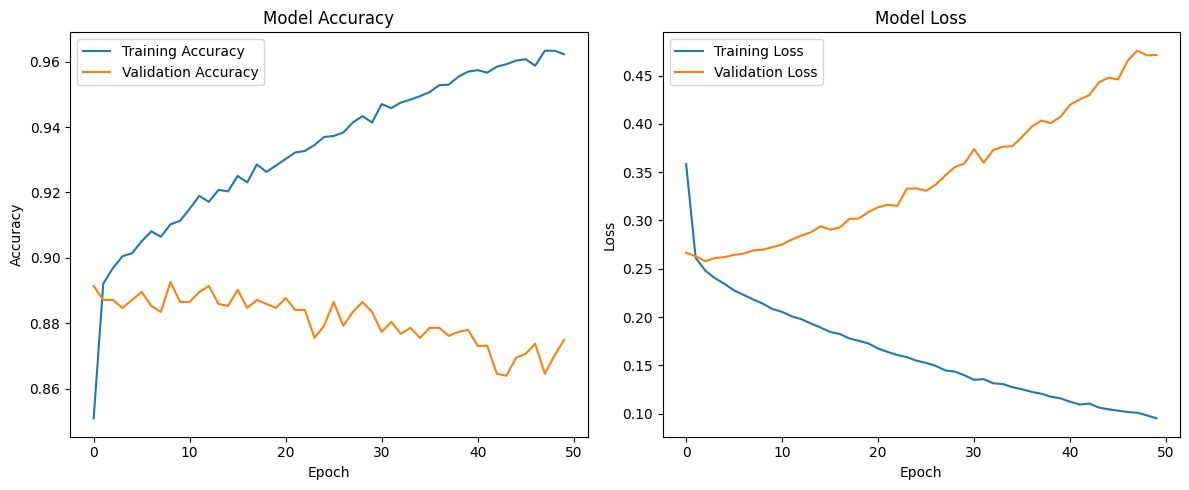

In [16]:
# 신경망
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 전처리: 결측치 처리 및 feature 선택
# df.fillna(0, inplace=True)  # 결측치를 0으로 대체


# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 신경망 모델 정의
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류를 위한 출력층

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 예측
y_pred_prob = model.predict(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # 확률을 이진 클래스로 변환

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 훈련 과정 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

F1 Score: 0.6552
ROC AUC Score: 0.9053


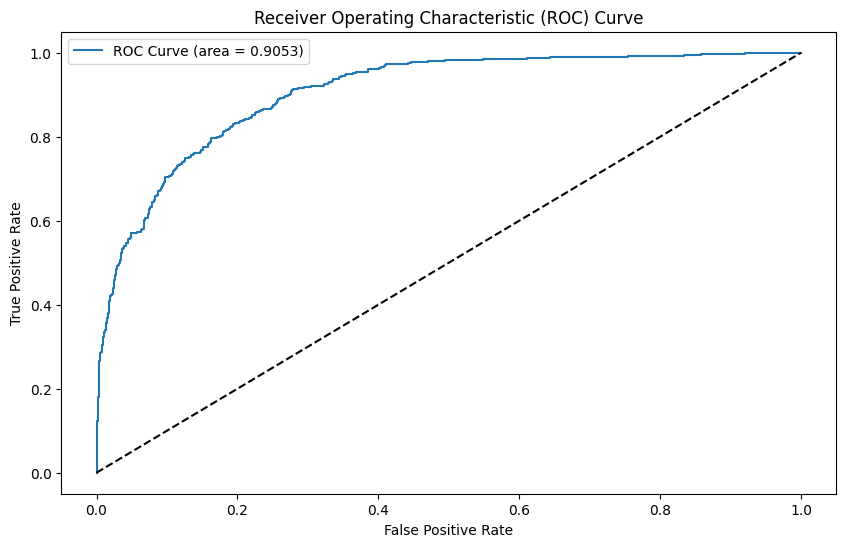

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve

# F1-score 계산
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# ROC Curve 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

[[1551   76]
 [ 150  271]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1627
           1       0.78      0.64      0.71       421

    accuracy                           0.89      2048
   macro avg       0.85      0.80      0.82      2048
weighted avg       0.88      0.89      0.89      2048



c:\python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:42:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Figure size 1000x600 with 0 Axes>

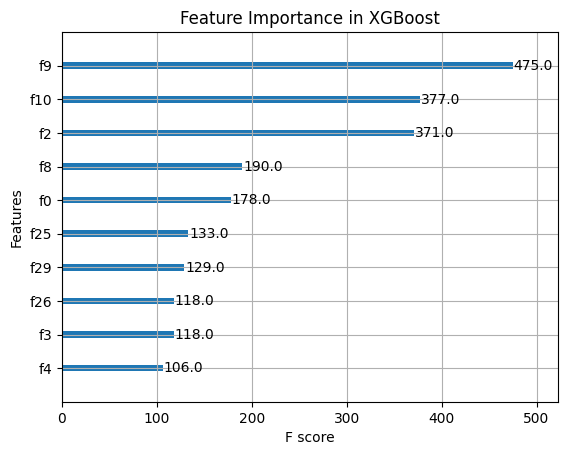

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt

# 데이터 전처리: 결측치 처리 및 feature 선택
# df.fillna(0, inplace=True)  # 결측치를 0으로 대체

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 특성 스케일링 (선택 사항, XGBoost는 스케일링에 민감하지 않지만 필요할 경우 사용)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBoost 모델 생성 및 훈련
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, max_num_features=10)
plt.title('Feature Importance in XGBoost')
plt.show()
